## Income Group Classification

## Context 
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government. 

### Objective

1. What are the different factors that influence the income of an individual?

2. To build a prediction model that can help the government formulate policies for the right pockets of the society.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

### Load data

In [2]:
who = pd.read_csv("who_data.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,>50K


### Understand the shape of the dataset.

In [6]:
data.shape

(32561, 14)

* The dataset has 32561 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          32561 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


* We see that names of the columns have spaces, dots, and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity along with column names
* Dependent variable is the salary which is of categorical type
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

In [8]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns =[col.replace(' ','_') for col in data.columns]
data.columns =[col.replace('-','_') for col in data.columns]
data.columns =[col.replace('.','') for col in data.columns]

In [9]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')


* column names are fixed

### Summary of the dataset.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

**Lets us look at different levels in categorical variables**

In [11]:
# filtering object type columns
cat_columns = data.describe(include=['object']).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'native_country', 'salary'],
      dtype='object')

In [12]:
for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in workclass are :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
Unique values in education are :
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
**************************************************
Unique values in marital_status are :
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 

* There are some values represented by a '?' in workclass, occupation, and native country columns which we should investigate further.
* There are many distinct values in native_country that can be reduced to their respective continents.
* The distinct levels of marital_status can also be reduced.

#### We can assume that wherever there is a ? the data is unknown or missing. Let us see if there is a pattern in the missingness.

#### workclass

In [13]:
data[data['workclass'] ==' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
6834,60,?,112821,Some-college,10,Married-civ-spouse,?,White,Male,0,0,35,United-States,>50K
3228,32,?,53042,HS-grad,9,Never-married,?,Black,Male,0,0,40,United-States,<=50K
23711,63,?,234083,HS-grad,9,Divorced,?,White,Female,0,2205,40,United-States,<=50K
2760,56,?,656036,HS-grad,9,Married-civ-spouse,?,White,Male,0,0,25,United-States,<=50K
14672,41,?,217921,9th,5,Married-civ-spouse,?,Asian-Pac-Islander,Female,0,0,40,Hong,<=50K


* From the sample it looks like wherever workclass is missing occupation is also missing. 
* It looks like for ? observations in workclass the native country is the United States.
* Let's see if the above observations hold.

In [14]:
data[data['workclass'] ==' ?']['occupation'].value_counts()

 ?    1836
Name: occupation, dtype: int64

* It is indeed true that wherever workclass has ? the occupation is also ?
* This indicates there is a strong pattern in the missingness of workclass and occupation. This is intuitive as well because both the columns are capturing similar information.

In [15]:
data[data['workclass'] ==' ?']['native_country'].value_counts()

 United-States         1659
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 Germany                  9
 South                    9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Puerto-Rico              5
 Italy                    5
 Poland                   4
 England                  4
 Portugal                 3
 Dominican-Republic       3
 Columbia                 3
 Japan                    3
 Cuba                     3
 Vietnam                  3
 France                   2
 Haiti                    2
 Guatemala                1
 Scotland                 1
 Trinadad&Tobago          1
 Jamaica                  1
 Honduras                 1
 Peru                     1
 Hong                     1
 Thailand                 1
 Cambodia                 1
 Laos                     1
 Ecuador                  1
 Iran                     1
 Nicaragua                1
Name: native_country

* The above observations don't hold for native_country as there many other countries where the observations are ?.

#### occupation

In [16]:
data[data['occupation'] ==' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
6733,21,?,152328,Some-college,10,Never-married,?,White,Male,0,0,20,United-States,<=50K
11732,76,?,312500,5th-6th,3,Widowed,?,White,Female,0,0,40,United-States,<=50K
20314,23,?,296613,Some-college,10,Never-married,?,White,Female,0,0,32,United-States,<=50K
11340,30,?,288419,5th-6th,3,Married-civ-spouse,?,White,Male,0,0,40,Mexico,<=50K
3439,40,?,162108,Bachelors,13,Divorced,?,White,Female,0,0,50,United-States,<=50K


In [17]:
data[data['occupation'] ==' ?']['workclass'].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

* We observe the same pattern here, where occupation is ? most of the values in workclass are ?.

In [18]:
data[data['occupation'] ==' ?']['native_country'].value_counts()

 United-States         1666
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 Germany                  9
 South                    9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Puerto-Rico              5
 Italy                    5
 Poland                   4
 England                  4
 Portugal                 3
 Dominican-Republic       3
 Columbia                 3
 Japan                    3
 Cuba                     3
 Vietnam                  3
 France                   2
 Haiti                    2
 Guatemala                1
 Scotland                 1
 Trinadad&Tobago          1
 Jamaica                  1
 Honduras                 1
 Peru                     1
 Hong                     1
 Thailand                 1
 Cambodia                 1
 Laos                     1
 Ecuador                  1
 Iran                     1
 Nicaragua                1
Name: native_country

* The native_country column has other countries where the observations are ? corresponding to ?s in occupation.

#### native_country

In [19]:
data[data['native_country'] ==' ?'].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
18438,31,Private,217962,Some-college,10,Never-married,Protective-serv,Black,Male,0,0,40,?,<=50K
23784,51,Private,178054,Some-college,10,Married-civ-spouse,Sales,White,Male,0,0,40,?,>50K
5309,41,Private,70037,Some-college,10,Never-married,Craft-repair,White,Male,0,3004,60,?,>50K
22106,24,State-gov,27939,Some-college,10,Married-civ-spouse,Other-service,Asian-Pac-Islander,Male,0,0,24,?,<=50K
6319,38,Private,189404,HS-grad,9,Married-spouse-absent,Other-service,White,Male,0,0,35,?,<=50K


In [20]:
data[data['native_country'] ==' ?']['occupation'].value_counts()

 Prof-specialty       102
 Other-service         83
 Exec-managerial       74
 Craft-repair          69
 Sales                 66
 Adm-clerical          49
 Machine-op-inspct     36
 ?                     27
 Transport-moving      25
 Handlers-cleaners     20
 Tech-support          16
 Priv-house-serv        6
 Protective-serv        5
 Farming-fishing        5
Name: occupation, dtype: int64

In [21]:
data[data['native_country'] ==' ?']['workclass'].value_counts()

 Private             410
 Self-emp-inc         42
 Self-emp-not-inc     42
 ?                    27
 Local-gov            26
 State-gov            19
 Federal-gov          17
Name: workclass, dtype: int64

* There is no clear pattern here.

#### Observations:
* We observe that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replace these ?'s with the 'unknown' category.

#### Replacing ? with 'Unknown'

In [22]:
data.workclass = data.workclass.apply(lambda x: 'Unknown' if x == ' ?' else x)
data.native_country = data.native_country.apply(lambda x: 'Unknown' if x == ' ?' else x)
data.occupation = data.occupation.apply(lambda x: 'Unknown' if x == ' ?' else x)

#### Mapping countries to continents to reduce the number of unique values.

In [23]:
data.native_country.nunique()

42

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data.

In [24]:
data.native_country = data.native_country.str.replace(' ','') # remove empty spaces from strings

In [25]:
north_america  = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                   "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                   "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                   "United-States"]
asia  = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          "Philippines", "Taiwan", "Thailand", "Vietnam"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands",
            "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
            "Yugoslavia"]
other  = ["South", "Unknown","?"]

In [26]:
def region_combining(x):
    if x in north_america:
        return 'north_america'
    elif x in asia:
        return 'asia'
    elif x in south_america:
        return 'south_america'
    elif x in europe:
        return 'europe'
    elif x in other:
        return 'other'
    else:
        return x

In [27]:
data['native_country'] = data['native_country'].apply(region_combining)

In [28]:
print('Distinct values in Native Country column:', data.native_country.nunique())

Distinct values in Native Country column: 5


#### Reducing the number of distinct values in marital_status

In [29]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [30]:
data.marital_status = data.marital_status.str.replace(' ','') # remove empty spaces from strings

married = ['Married-civ-spouse','Married-AF-spouse']
not_married = ['Divorced','Separated','Widowed','Married-spouse-absent']

def reduce_marital_status(x):
    if x in married:
        return 'married'
    elif x in not_married:
        return 'not_married'
    else:
        return x

In [31]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [32]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

## Univariate Analysis

In [33]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on fnlwgt

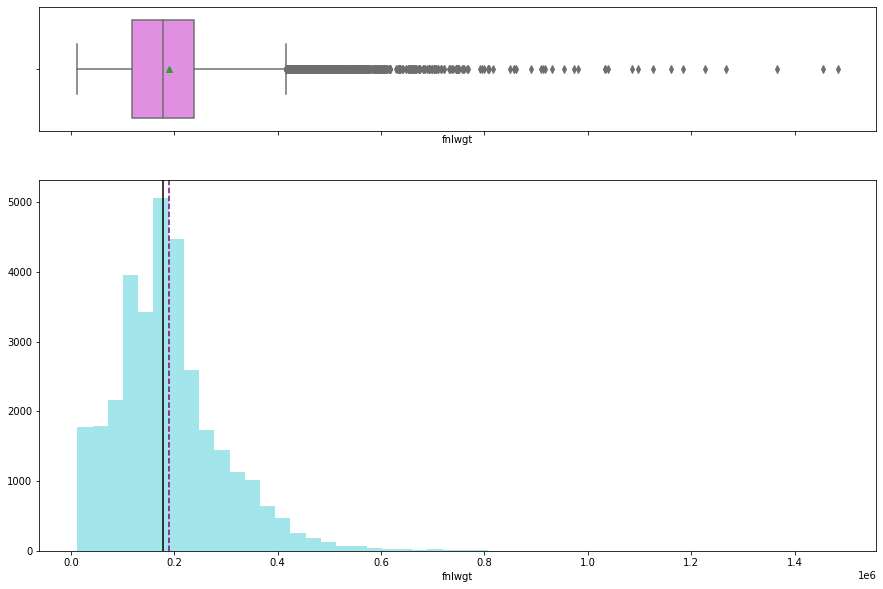

In [34]:
histogram_boxplot(data.fnlwgt)

* fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.

### Observations on hours_per_week

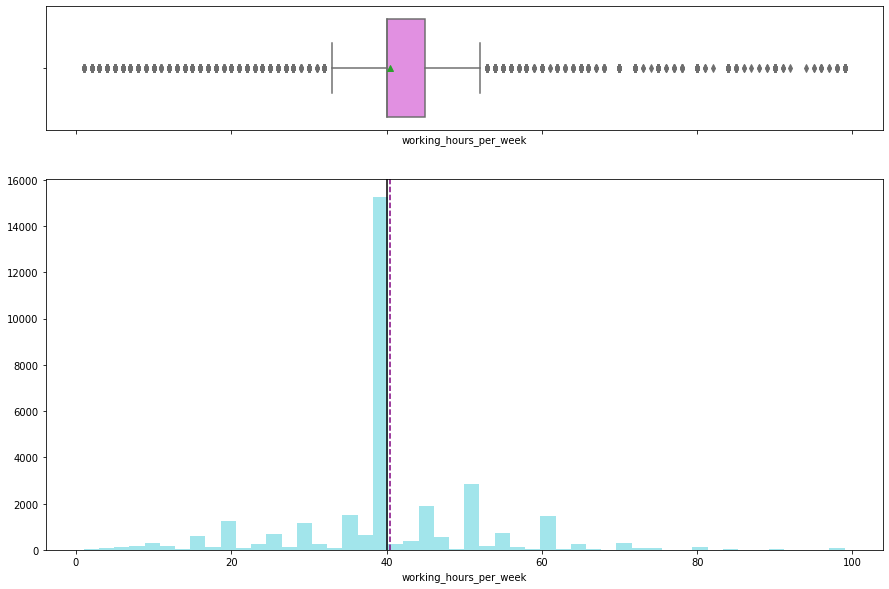

In [35]:
histogram_boxplot(data.working_hours_per_week)

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers like working  1 hour a week which needs to be treated.

In [36]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on workclass

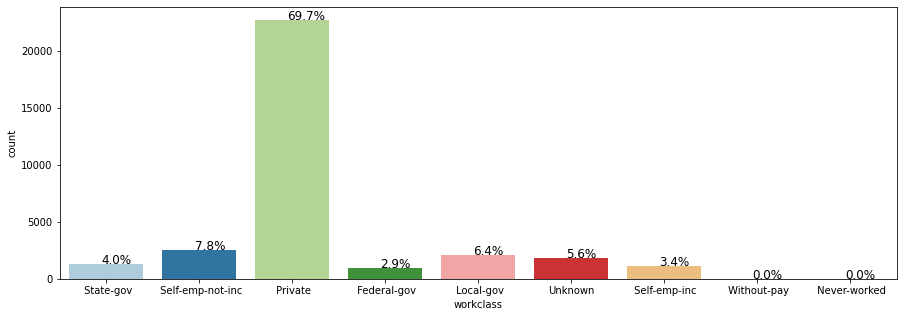

In [37]:
perc_on_bar('workclass')

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

### Observations on marital_status

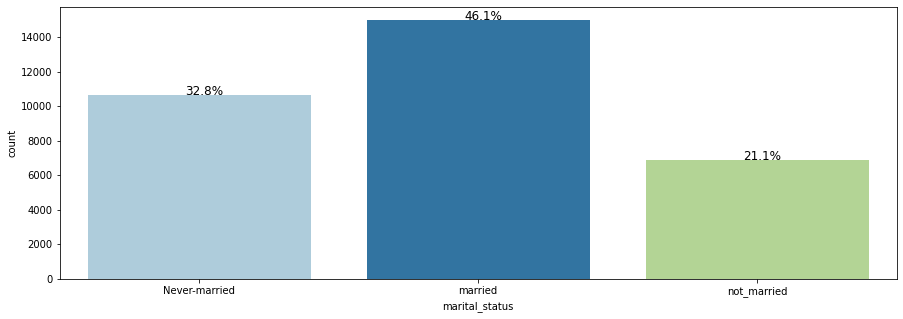

In [38]:
perc_on_bar('marital_status')

* 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.

### Observations on native_country

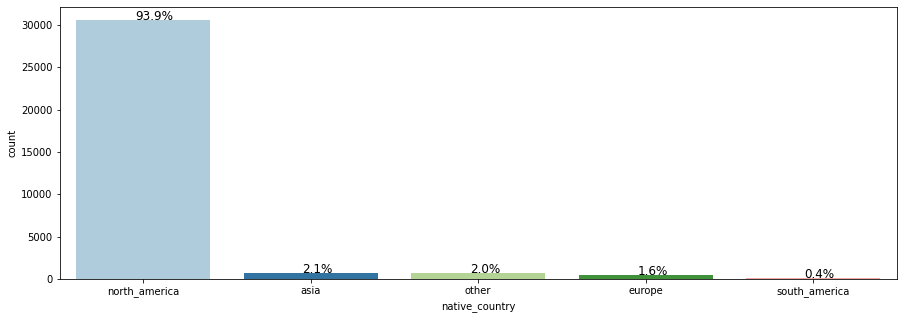

In [39]:
perc_on_bar('native_country')

* 94% of the people are native to north_america followed by 2.1% Asians.

### Observations on salary

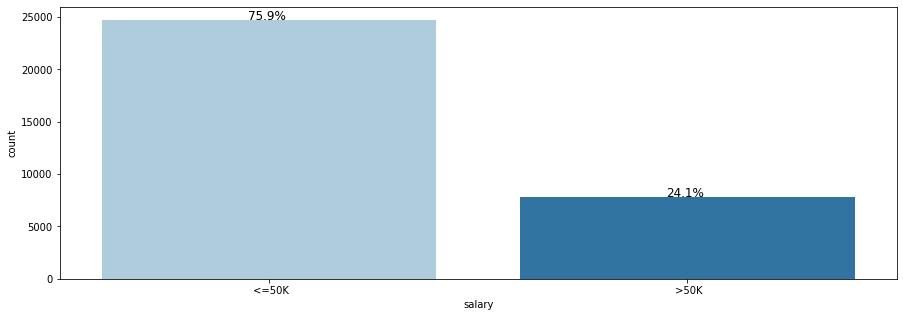

In [40]:
perc_on_bar('salary')

* 24% of the observations have a salary above 50K and while 76% have a salary below 50K

## Bivariate analysis

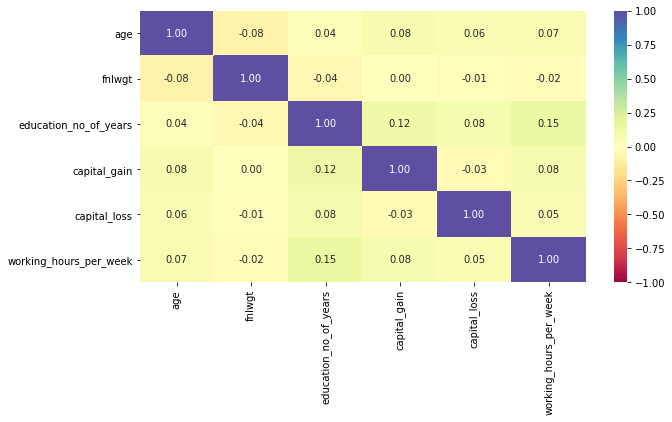

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* There is no significant correlation between the columns.

In [42]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['salary'],margins=True).sort_values(by=' >50K',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['salary'],normalize='index').sort_values(by=' >50K',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

salary    <=50K   >50K    All
sex                          
All       24720   7841  32561
 Male     15128   6662  21790
 Female    9592   1179  10771
------------------------------------------------------------------------------------------------------------------------


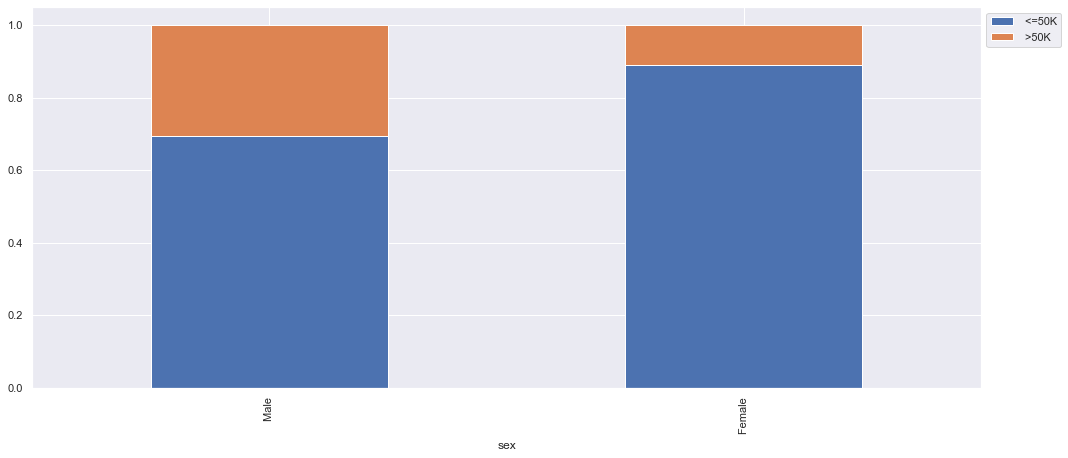

In [43]:
stacked_plot(data['sex'])

* ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

### salary vs education

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


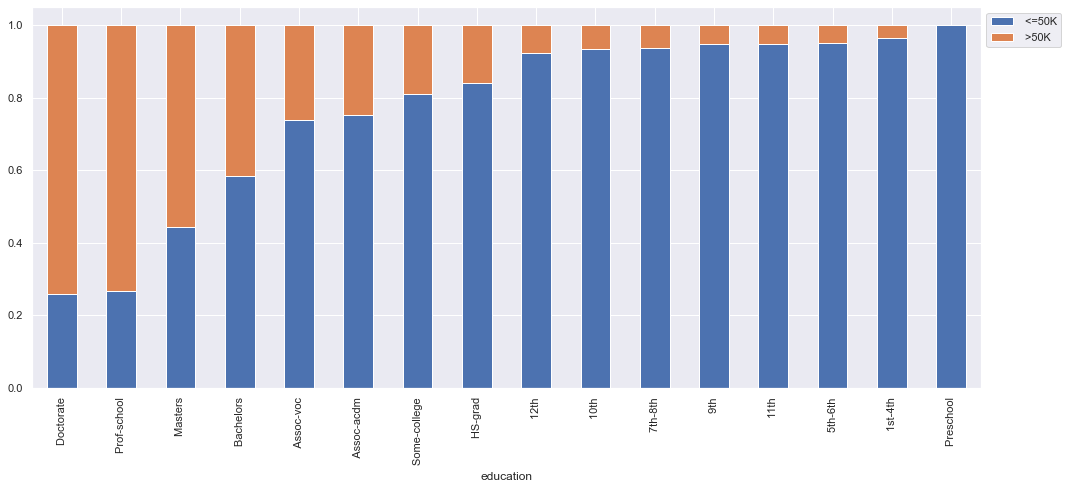

In [44]:
stacked_plot(data['education'])

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

### salary vs occupation

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


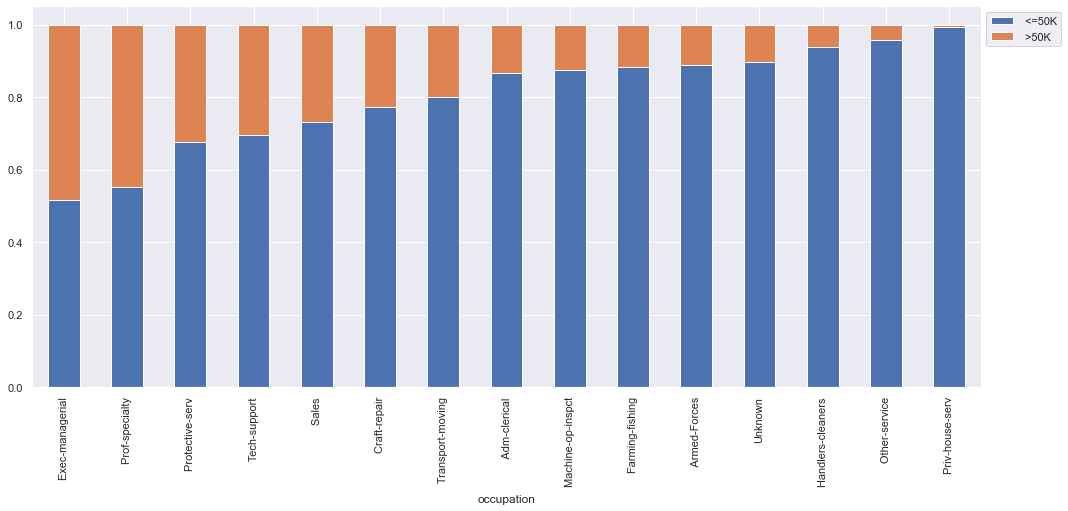

In [45]:
stacked_plot(data['occupation'])

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs race

salary                <=50K   >50K    All
race                                     
All                   24720   7841  32561
 White                20699   7117  27816
 Black                 2737    387   3124
 Asian-Pac-Islander     763    276   1039
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


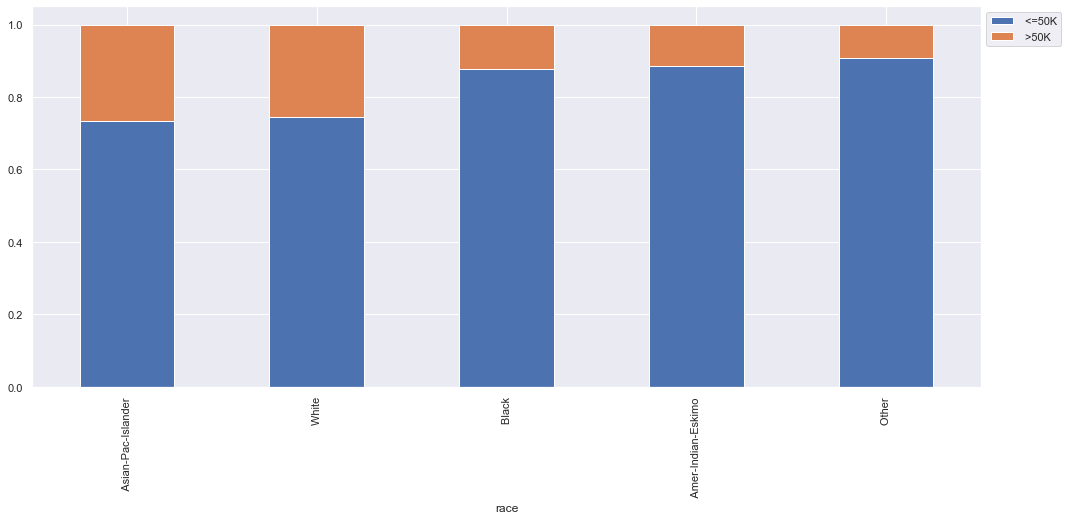

In [46]:
stacked_plot(data['race'])

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


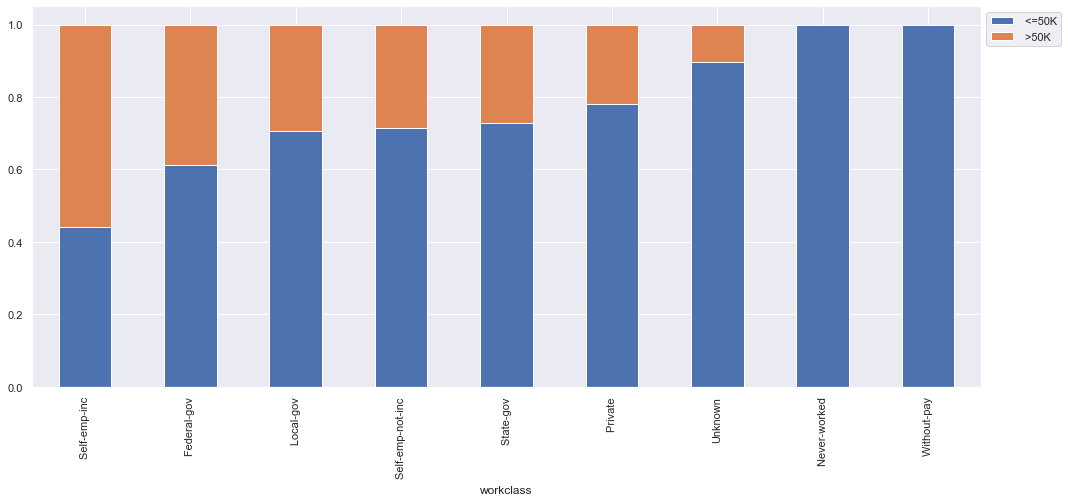

In [47]:
stacked_plot(data['workclass'])

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

### salary vs marital_status

salary           <=50K   >50K    All
marital_status                      
All              24720   7841  32561
married           8297   6702  14999
not_married       6231    648   6879
Never-married    10192    491  10683
------------------------------------------------------------------------------------------------------------------------


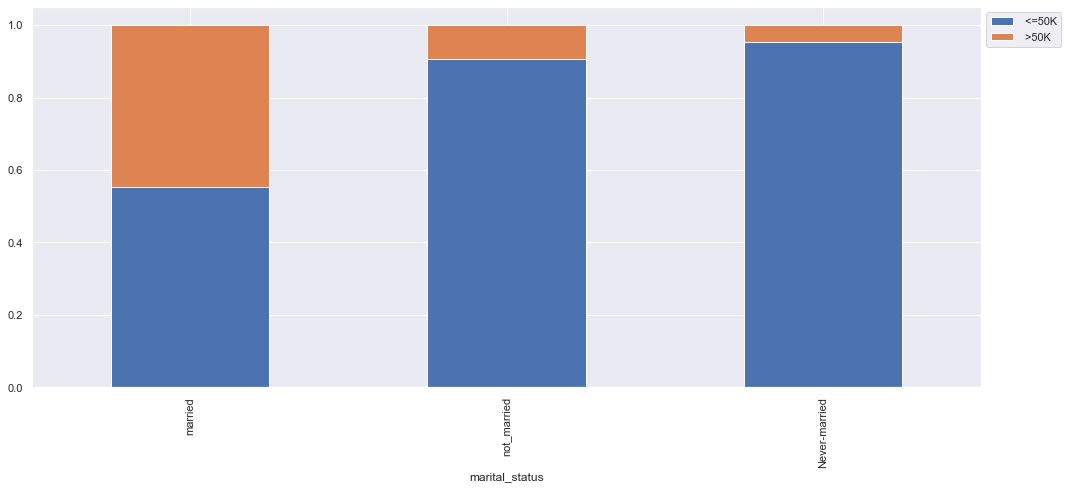

In [48]:
stacked_plot(data['marital_status'])

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

In [49]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='salary'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of people with <=50K salary',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == ' <=50K')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of people with >50K salary",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == ' >50K')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t salary',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t salary - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### salary vs age

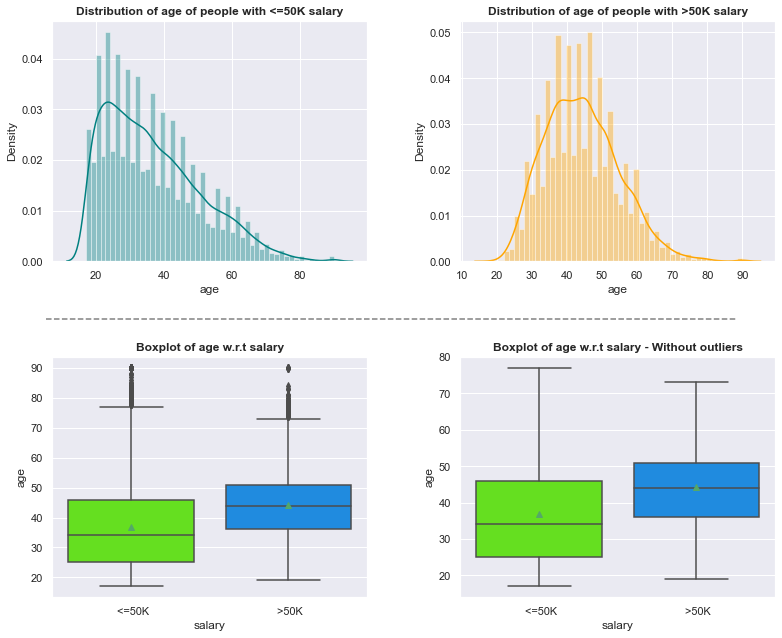

In [50]:
plot('age')

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

### salary vs working_hours_per_week

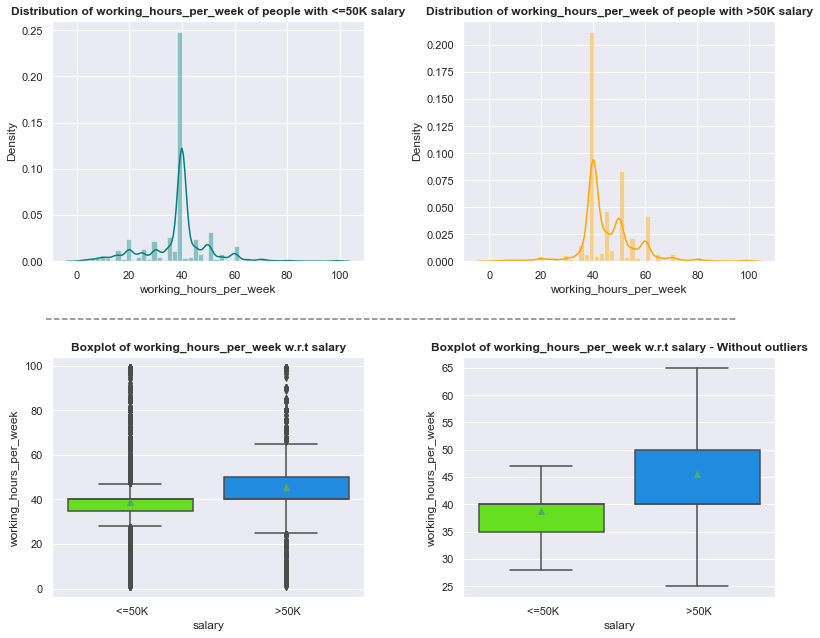

In [51]:
plot('working_hours_per_week')

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

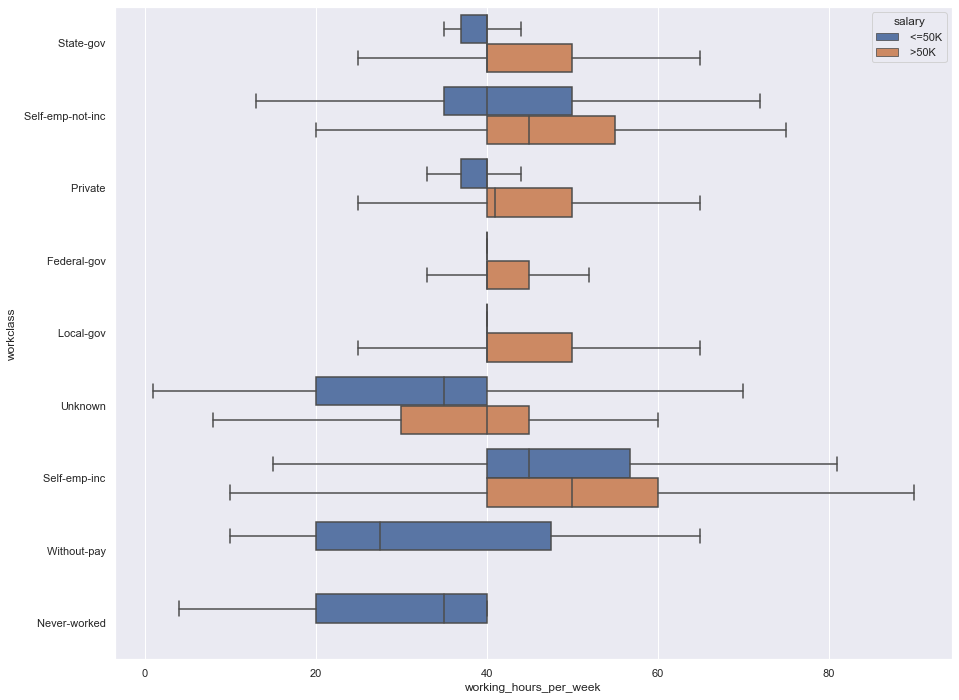

In [52]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15,12))
sns.boxplot(y="workclass", x="working_hours_per_week", data=data,hue='salary',showfliers=False);

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `fnlwght`: fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.
* `working_hours_per_week`: Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week. Some of the observations are clear outliers like working  1 hour a week which needs to be treated.
* `workclass`: ~70% of the observations are from the Private sector working class.
* `marita_status`: 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.
* `race`: * 94% of the people are native to north_america followed by 2.1% Asians.
* `salary vs sex`: ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* `salary vs occupation`: - ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.
* `salary vs education`: ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars
* `salary vs workclass`: ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K. ~20% of the people working in the private sector earn more than 50K.
* `salary vs working_hours_per_week`: Majority of people having above 50K salary work around 40 hours per week.
* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.


**Actions for data pre-processing:**

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

* Dropping capital_gain and capital_loss
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [53]:
data.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

**Outliers detection using boxplot**

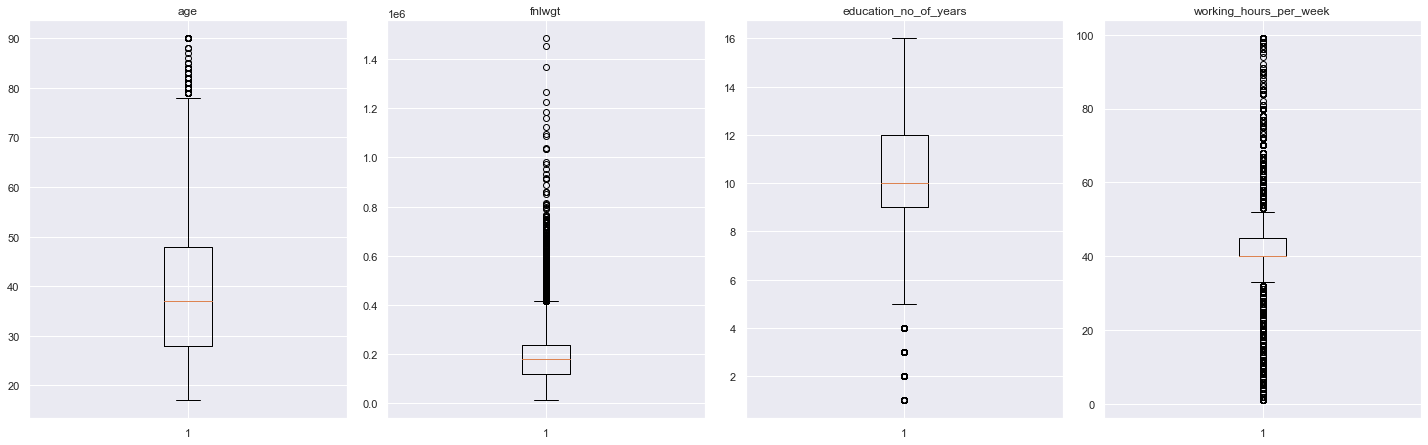

In [54]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [55]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [56]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

# treating outliers
numerical_col = [ele for ele in numerical_col] 
data = treat_outliers_all(data,numerical_col)

### Data Preparation

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [57]:
data['salary'] = data['salary'].apply(lambda x: 1 if x==' <=50K' else 0) 

**Creating training and test sets.**

In [58]:
X = data.drop(['salary'], axis=1)
Y = data['salary']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [59]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Shape of Training set :  (22792, 52)
Shape of test set :  (9769, 52)
Percentage of classes in training set:
 1    0.753335
0    0.246665
Name: salary, dtype: float64
Percentage of classes in test set:
 1    0.772853
0    0.227147
Name: salary, dtype: float64


### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a salary >50K but actually the salary is <=50K.
2. Predicting a person doesn't have a salary >50K but actually, the salary is >50k.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a salary >50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme.

* If we predict a person doesn't have a salary >50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme.

### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [60]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - <=50K","Actual - >50K"]],
                  columns = [i for i in ['Predicted - <=50K','Predicted - >50k']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

Accuracy on training set :  0.8331870831870832
Accuracy on test set :  0.8378544375063978
Recall on training set :  0.9224810716365754
Recall on test set :  0.9172185430463576
Precision on training set :  0.8650464227198252
Precision on test set :  0.8783612379502791
F1 on training set :  0.8928410372040587
F1 on test set :  0.8973694440844888


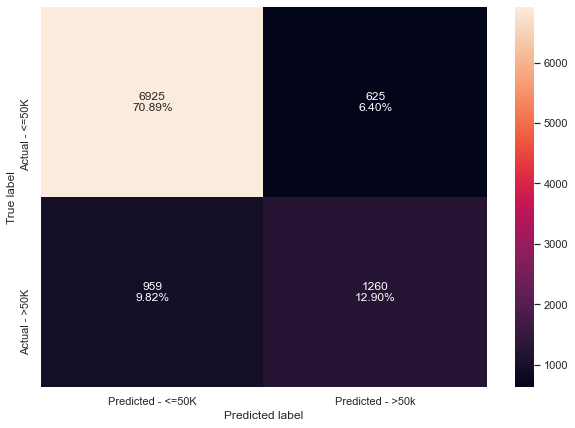

In [62]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver='newton-cg',random_state=1)
model  = lg.fit(X_train,y_train)

# checking model performances for this model
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

#### ROC-AUC

* ROC-AUC on training set

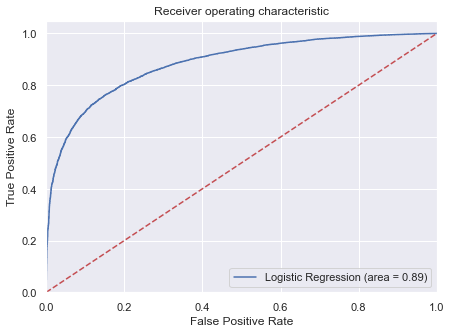

In [63]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

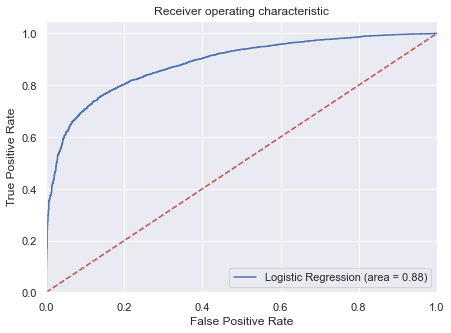

In [64]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training and test set but the recall is low.

### Finding the coefficients

In [65]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,age,fnlwgt,education_no_of_years,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
coef,-0.029529,-8.925596e-07,-0.283958,-0.067311,0.649183,0.157665,0.419878,0.057096,0.869247,0.621048,1.065045,0.487248,0.198424,0.015041,0.268667,0.014616,0.091053,0.151029,0.283974,-0.0386,-0.080375,-0.130003,-0.056266,-0.187521,0.679639,-0.554117,-0.100737,-2.539469,-0.411738,0.334607,-0.106151,-0.766541,0.95328,0.684906,0.291789,0.90916,1.253174,-0.484577,-0.50777,-0.205512,-0.57919,0.160558,0.644913,-0.369245,-0.248178,0.035223,-0.372949,-0.053584,-0.351826,-0.232406,0.099283,1.341883


### Coefficient interpretations

* Coefficient of age, fnlwgt, education_no_of_years,working_hours_per_week,sex_Male, some levels of education and marital_status, occupation, race and native country are negative, increase in these will lead to decrease in chances of a person having <=50K salary. 
* Coefficient all the levels of workclass,some levels of occupation, race, native country positive increase in these will lead to increase in chances of a person having <=50K salary.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [66]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,age,fnlwgt,education_no_of_years,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
odds,0.970902,0.999999,0.752798,0.934905,1.913977,1.170774,1.521775,1.058757,2.385114,1.860877,2.900971,1.62783,1.21948,1.015154,1.30822,1.014723,1.095327,1.16303,1.328398,0.962136,0.92277,0.878093,0.945288,0.829011,1.973164,0.574579,0.904171,0.078908,0.662498,1.397391,0.899289,0.464617,2.594205,1.983585,1.33882,2.482238,3.50144,0.615958,0.601836,0.81423,0.560352,1.174166,1.905822,0.691256,0.780221,1.035851,0.6887,0.947826,0.703403,0.792624,1.104379,3.826243


**Percentage change in odds**

In [67]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,age,fnlwgt,education_no_of_years,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
change_odds%,-2.909761,-0.000089,-24.720172,-6.509515,91.397717,17.077427,52.177521,5.875744,138.511383,86.087701,190.097097,62.783014,21.947984,1.515439,30.821974,1.472302,9.532701,16.30303,32.839784,-3.786428,-7.722992,-12.190677,-5.471241,-17.098869,97.316441,-42.54208,-9.582883,-92.109171,-33.750218,39.739083,-10.071106,-53.538276,159.420473,98.358496,33.882035,148.223773,250.144043,-38.404202,-39.816359,-18.576987,-43.964776,17.416595,90.582164,-30.874379,-21.977892,3.585115,-31.129985,-5.21736,-29.659716,-20.737597,10.437914,282.624316


### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by 0.97 times or a 2.90% decrease in odds of having salary <=50K.
* `education_no_of_years`: Holding all other features constant a 1 unit change in the education_no_of_years will decrease the odds of a person having salary <=50k by 0.75 times or a 24.7% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by 0.93 times or a decrease of 6.50% increase in odds of having salary <=50K.
* The odds of a male having salary <=50K is 0.94 times less than a female or a 5.21% fewer odds than female.
* The odds of a person whose marital status is married having a salary <=50K is 0.078 less than the person who was never married or 92.10% fewer odds of having salary <=50K. Similarly, The odds of a person whose marital status is not_married having a salary <=50K is 0.66 times less than the person who was never married or 33.75% fewer odds of having a salary <=50K than the person who was never married. [keeping Never_married category as a reference].

`Interpretation for other attributes can be done similarly.`

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7723692308375555


In [69]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.7817655317655318
Accuracy on test set :  0.7812468011055379
Recall on training set :  0.7588235294117647
Recall on test set :  0.7580132450331126
Precision on training set :  0.9399076612321454
Precision on test set :  0.9486159456323554
F1 on training set :  0.8397138437741686
F1 on test set :  0.8426709857910624
ROC-AUC Score on training set :  0.8053278088182979
ROC-AUC Score on test set :  0.8091553381542309


* The precision of the model has improved but the F1 score has reduced on training and test set.

#### Let's use Precision-Recall curve and see if we can find a better threshold

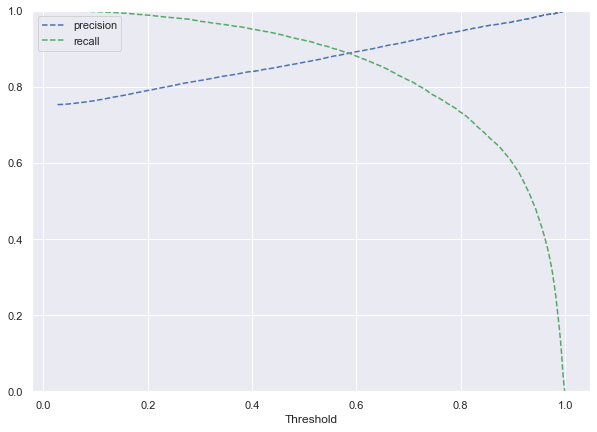

In [70]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [71]:
optimal_threshold_curve = 0.58

scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.8322218322218322
Accuracy on test set :  0.8282321629644794
Recall on training set :  0.8907979033197437
Recall on test set :  0.879205298013245
Precision on training set :  0.8869751797726746
Precision on test set :  0.8965424095083738
F1 on training set :  0.8888824315685476
F1 on test set :  0.8877892202755115
ROC-AUC Score on training set :  0.7720620608736748
ROC-AUC Score on test set :  0.767002378614554


* Model is performing well on training and test set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

## Note: Kindly  do not run the code cells containing the Sequential Feature Selector implementation during the session, since that algorithm takes considerable time to run.

### Sequential Feature Selector

#### Selecting subset of important features using Sequential Feature Selector method

**Why we should do feature selection?**

- Reduces dimensionality.
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization).
- Speeds training/testing.

### How sequential feature selector works?
* It starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.

In [72]:
# Sequential feature selector is present in mlxtend library
# !pip install mlxtend to install mlxtent library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [73]:
## Defining X and Y variables
X = data.drop(['salary'], axis=1)
Y = data['salary']

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [74]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [75]:
X_train.shape

(22792, 52)

In [76]:
# we will first build model with all varaible
sfs = SFS(model, k_features=52, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    7.4s finished

[2021-05-20 20:18:19] Features: 1/52 -- score: 0.8651903328467779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    4.3s finished

[2021-05-20 20:18:24] Features: 2/52 -- score: 0.8828389862839133[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished

[2021-05-20 20:18:29] Features: 3/52 -- score: 0.8862069032832736[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  49 out o

[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   11.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.9s finished

[2021-05-20 20:24:46] Features: 33/52 -- score: 0.8912209124760316[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:   10.1s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   14.4s finished

[2021-05-20 20:25:00] Features: 34/52 -- score: 0.8911901196719475[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   10.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   15.3s finished

[2021-05-20 20:25:16] Features: 35/52 -- score: 0.8911641015674409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    9.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  17 ou

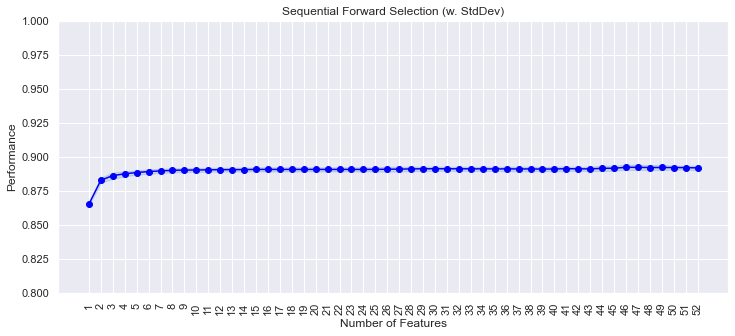

In [77]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.show()

* We can see that performance increases till the 8th feature and then became constant.
* So we'll use 8 features only to build our mode but the choice of k_features it depends on the business context and use case of the model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  52 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    2.7s finished

[2021-05-20 20:29:13] Features: 1/8 -- score: 0.8651903328467779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    5.4s finished

[2021-05-20 20:29:18] Features: 2/8 -- score: 0.8828389862839133[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished

[2021-05-20 20:29:24] Features: 3/8 -- score: 0.8862069032832736[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]

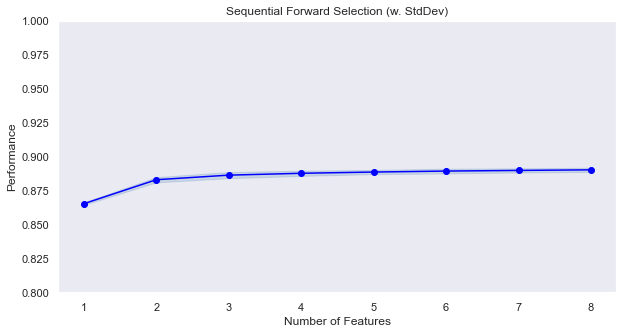

In [78]:
sfs1 = SFS(model, k_features=8, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev',figsize=(10,5))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

**Finding which features are important?**

In [79]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 7, 11, 18, 27, 31, 32, 35]


**Let's look at best 8 variables**

In [80]:
X_train.columns[feat_cols]

Index(['education_no_of_years', 'workclass_ Self-emp-inc', 'workclass_Unknown',
       'education_ Assoc-acdm', 'marital_status_married',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Other-service'],
      dtype='object')

In [81]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [82]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

Accuracy on training set :  0.8251140751140751
Accuracy on test set :  0.8295629030607022
Recall on training set :  0.9397204426324985
Recall on test set :  0.935364238410596
Precision on training set :  0.845384051136959
Precision on test set :  0.8571428571428571
F1 on training set :  0.8900595763459841
F1 on test set :  0.894546836405092


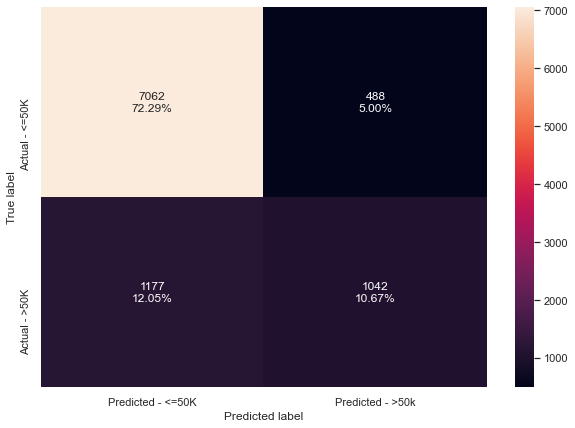

In [83]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(logreg,X_test_final,y_test)

* Model is giving a generalized performance on training and test set.
* With a fewer number of features, the model performance is comparable to the initial logistic regression model.

### Model Performance Summary

In [84]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,flag=False)
    k = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    
    #intial model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    #optimal threshold = 0.77  
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    #optimal threshold = 0.58
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [85]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [87]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression-0.77 Threshold',
                                          'Logistic Regression-0.58 Threshold)','Logistic Regression (SFS - 8 variable)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_Score':f1_train,'Test_F1_Score':f1_test}) 



comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Logistic Regression,0.833187,0.837854,0.922481,0.917219,0.865046,0.878361,0.892841,0.897369
1,Logistic Regression-0.77 Threshold,0.781766,0.781247,0.758824,0.758013,0.939908,0.948616,0.839714,0.842671
2,Logistic Regression-0.58 Threshold),0.832222,0.828232,0.890798,0.879205,0.886975,0.896542,0.888882,0.887789
3,Logistic Regression (SFS - 8 variable),0.825114,0.829563,0.939720,0.935364,0.845384,0.857143,0.890060,0.894547


### Conclusion
- We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly. (Inital logistic regression model and Logistic regression with 8 features).
- We found that education_no_of_years, workclass,education, marital_status_married, and occupation are important features.
* Coefficient of age, fnlwgt, education_no_of_years,working_hours_per_week,sex_Male, some levels of education and marital_status, occupation, race and native country are negative, increase in these will lead to decrease in chances of a person having <=50K salary. 
* Coefficient all the levels of workclass,some levels of occupation, race, native country positive increase in these will lead to increase in chances of a person having <=50K salary.

### Recommendations

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

#### Things to try:
* Perform more univariate and bivariate analysis to get a better understanding of distributions.